In [2]:
# 출처: https://datascienceschool.net/view-notebook/1d93b9dc6c624fbaa6af2ce9290e2479/
import tensorflow as tf


In [5]:
import numpy as np
import keras
from matplotlib import pyplot as plt

Using TensorFlow backend.


# Simple RNN

- 출력값이 한개인 기본적인 RNN layer 사용해보기

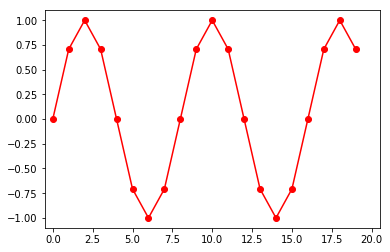

(20,)


In [13]:
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.show()
print(s.shape)

In [ ]:
.s

s shape is (19, 20)


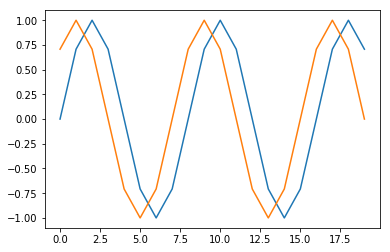

In [19]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
print(f"s shape is {S.shape}")
# print(S)
plt.plot(S[0])
plt.plot(S[1])
plt.show()

In [20]:
X_train = S[:-1, :3][:, :, np.newaxis] #np.newaxis == np.expand_dims
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

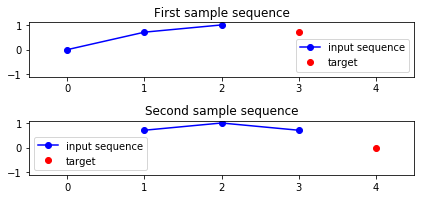

In [27]:
plt.subplot(311)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(312)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [53]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')

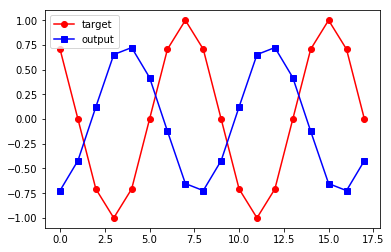

In [36]:

initial_predicted = model.predict(X_train)
plt.plot(Y_train, 'ro-', label='target')
plt.plot(initial_predicted, 'bs-', label='output')
plt.legend()
plt.show()

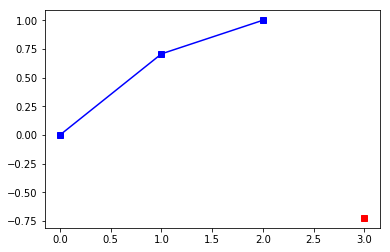

In [49]:
plt.plot([0,1,2], X_train[0,:,0], 'bs-')
plt.plot([3], initial_predicted[0], 'rs-')
plt.show()

In [54]:
hist = model.fit(X_train, Y_train, epochs=100, verbose=0)

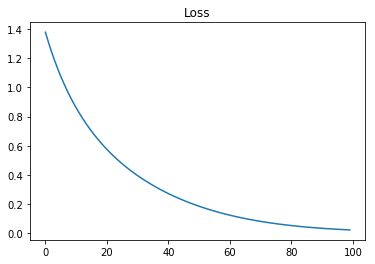

In [55]:
plt.plot(hist.history["loss"])
plt.title("Loss")
plt.show()

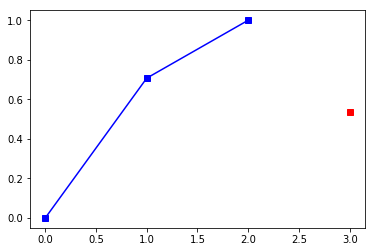

In [56]:
after_predicted = model.predict(X_train)
plt.plot([0,1,2], X_train[0,:,0], 'bs-')
plt.plot([3], after_predicted[0], 'rs-')
plt.show()

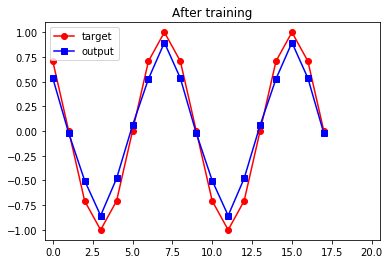

In [57]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 20.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

# Sequence to Sequence

- SimpleRNN layer 를 `squence=True`옵션을 주어서 사용해보기.
- `TimeDistributed`를 사용해서 sequence 개수를 유지하면서 `Dense` 레이어 연산 수행하기 

In [69]:
from keras.layers import TimeDistributed

model2 = Sequential()
model2.add(SimpleRNN(10, return_sequences=True, input_shape=(3, 1)))
model2.add(TimeDistributed(Dense(1, activation="linear")))
model2.compile(loss='mse', optimizer='sgd')
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 3, 10)             120       
_________________________________________________________________
time_distributed_4 (TimeDist (None, 3, 1)              11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [67]:
X_train2 = S[:-3, 0:3][:, :, np.newaxis]
Y_train2 = S[:-3, 3:6][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((16, 3, 1), (16, 3, 1))

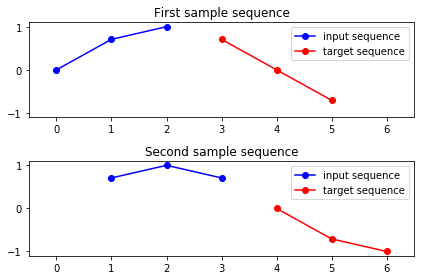

In [68]:
plt.subplot(211)
plt.plot([0, 1, 2], X_train2[0].flatten(), 'bo-', label="input sequence")
plt.plot([3, 4, 5], Y_train2[0].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("First sample sequence")
plt.subplot(212)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.xlim(-0.5, 6.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()


In [70]:
history2 = model2.fit(X_train2, Y_train2, epochs=100, verbose=0)


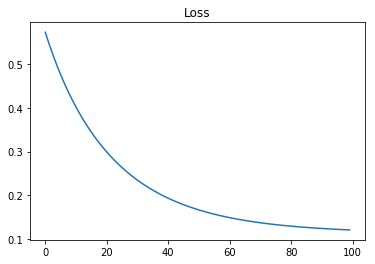

In [71]:
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.show()


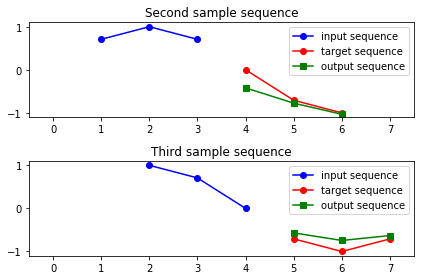

In [72]:
plt.subplot(211)
plt.plot([1, 2, 3], X_train2[1].flatten(), 'bo-', label="input sequence")
plt.plot([4, 5, 6], Y_train2[1].flatten(), 'ro-', label="target sequence")
plt.plot([4, 5, 6], model2.predict(X_train2[1:2, :, :]
                                   ).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Second sample sequence")
plt.subplot(212)
plt.plot([2, 3, 4], X_train2[2].flatten(), 'bo-', label="input sequence")
plt.plot([5, 6, 7], Y_train2[2].flatten(), 'ro-', label="target sequence")
plt.plot([5, 6, 7], model2.predict(X_train2[2:3, :, :]
                                   ).flatten(), 'gs-', label="output sequence")
plt.xlim(-0.5, 7.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Third sample sequence")
plt.tight_layout()
plt.show()